In [1]:
import io
import pydot 
from PIL import Image
import retworkx as rx

from qiskit.test.mock import FakeMumbai

In [2]:
device = FakeMumbai() 
conf = device.configuration()

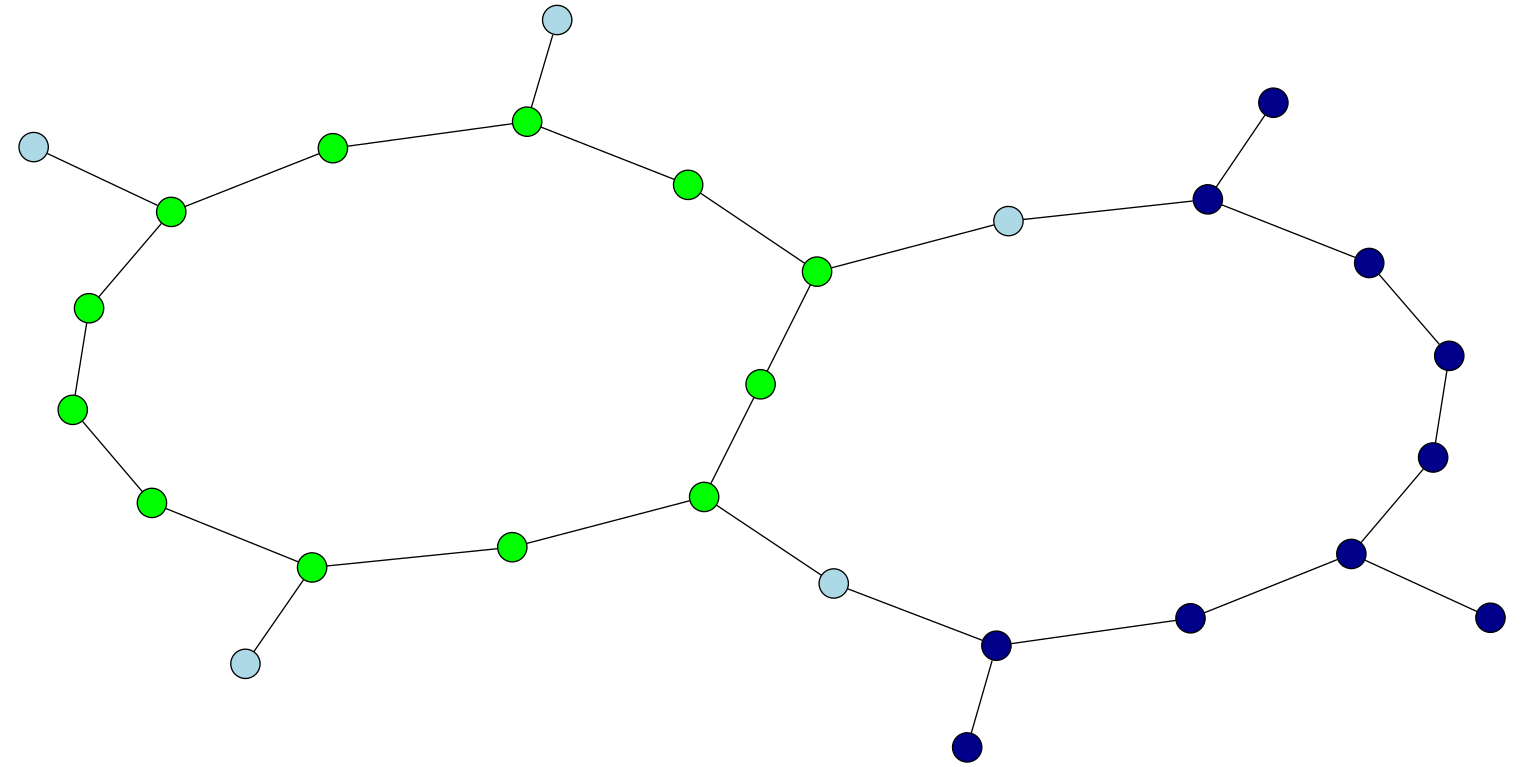

In [23]:
graph = rx.PyGraph(multigraph=False)
coupling_map = [tuple(edge) for edge in conf.coupling_map]
graph.add_nodes_from([i for i in range(27)])
graph.add_edges_from_no_data(coupling_map)
circle_nodes = [12, 13, 14, 16, 19, 22, 25, 24, 23, 21, 18, 15]
neighbor_nodes = [10, 11, 20, 26, 17]

def node_attr(node):
    kwargs = dict(style='filled', shape="circle", label="", fixedsize="true", width="0.3", height="0.3")
    if node in circle_nodes:
        kwargs.update(fillcolor='green')
    elif node in neighbor_nodes:
        kwargs.update(fillcolor='lightblue')
    else:
        kwargs.update(fillcolor='darkblue')
    return kwargs
graph_attr = {"center": "true", "mode": "KK", "ratio": "0.5"}

dot_str = graph.to_dot(node_attr=node_attr, graph_attr=graph_attr)
dot = pydot.graph_from_dot_data(dot_str)[0]
png = dot.create_png(prog='neato')
Image.open(io.BytesIO(png))